# Logistic Regression

A second **supervised learning method** that in spite of being called a regression measure, is actually used for **classification** and it’s called logistic regression. Logistic regression can be seen as a kind of **generalized linear model**. And like ordinary least squares and other regression methods, logistic regression takes a set input variables, the features, and estimates a target value. However, unlike ordinary linear regression, in it's most basic form logistic repressions target value is a binary variable instead of a continuous value. 

### Linear Regression
![Linear Regression](https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/linear%20regression.PNG?raw=true)

#### Logistic regression is similar to linear regression, but with one critical addition. 
![Logistic Regression](https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/logistic%20Regression.PNG?raw=true)

The logistic regression model still computes a weighted sum of the input features $x_i$ and the intercept term $b$, but it runs this result through a special non-linear function $f$, the logistic function represented by this new box in the middle of the diagram to produce the output $y$. The effect of applying the logistic function is to compress the output of the linear function so that it's limited to a range between 0 and 1.

We could identify data instances with the target value of 0 as belonging to the negative class and data instances with a target value of 1 belonging to the positive class. Then the value of $\hat{y}$, that's the output from the logistic regression formula, can be interpreted as the probability that the input data instance belongs to the positive class, given its input features. 

Using logistic regression gives a linear decision boundary between the classes as shown here. 
![DB Logistic](https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/decision%20boundary%20logistic.PNG?raw=true)
 
#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

### 1. Import Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

### 2. Load Fruits data

In [7]:
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


<IPython.core.display.Javascript object>


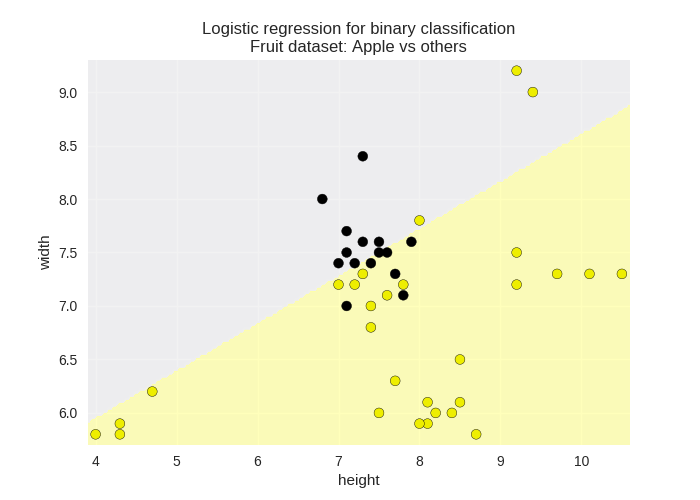

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


In [9]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Regularization Paramter $C$
Like ridge and lasso regression, a **regularization penalty** on the model coefficients can also be applied with logistic regression, and is controlled with the parameter $C$. In fact, the same L2 regularization penalty used for ridge regression is **turned ON by default** for logistic regression with a default value $C$ = 1. Note that for both Support Vector machines and Logistic Regression, **_higher values of $C$ correspond to less regularization_**. With large values of $C$, logistic regression tries to fit the training data as well as possible. While with small values of $C$, the model tries harder to find model coefficients that are closer to 0, even if that model fits the training data a little bit worse.

#### Effect of Parameter $C$ on Training and Test Scores
![SCores](https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/parameter%20CLogistic.PNG?raw=true)

<IPython.core.display.Javascript object>


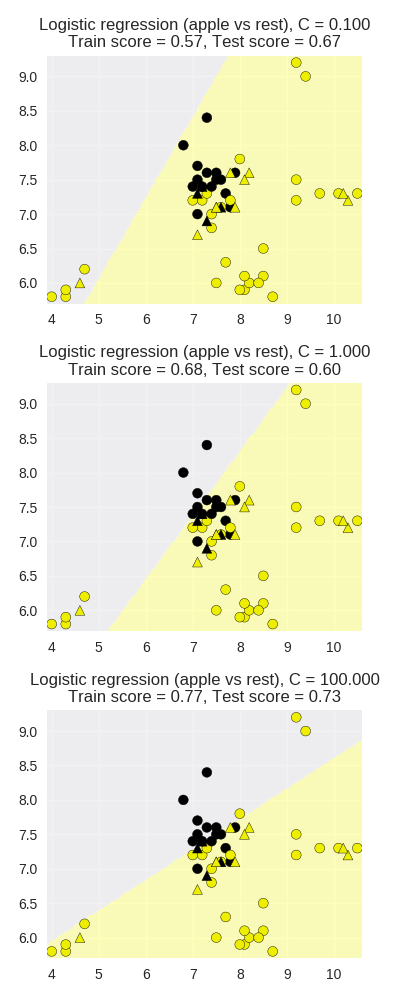

In [12]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

### Application on Breast Cancer Dataset

#### Load Data

In [16]:
# Breast cancer dataset for classification
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Test-train split

In [18]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
clf = LogisticRegression().fit(X_train, y_train)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Accuracy Scores

In [20]:
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96
